In [59]:
import os
import sys
import ursse.path_assistant as pa
shift = pa.PathAssistant('shift_06_16_2021')
from config_ursse import get_from_config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iota_period_sec = get_from_config("IOTA_revolution_period")

In [60]:
shift.get_shift_files()

['osc_evolution_000.ptu', 'osc_evolution_001.ptu', 'osc_evolution_003.ptu']

In [61]:
for i,f in enumerate(shift.get_shift_files()):
    print(f'Working on {f}, {i+1} out of {len(shift.get_shift_files())}')
    shift.generate_csv_cache(f)

Working on osc_evolution_000.ptu, 1 out of 3
Working on osc_evolution_001.ptu, 2 out of 3
Working on osc_evolution_003.ptu, 3 out of 3


In [62]:
df = pd.read_csv(os.path.join(shift.time_stamp_files_folder_path, "cache", 'osc_evolution_003.csv'))
df

,revolution,channel,delay
0,1112,2,19397
1,1242,2,20236
2,1530,2,19877
3,2831,2,19962
4,3517,2,19947
...,...,...,...
226670,75016517,2,20192
226671,75016860,2,19943
226672,75016866,2,126421
226673,75017074,2,19922


In [63]:
np.sum(df['channel'] == 5)

1

In [65]:
marker_idx = df[df['channel'] == 5].index[0]
marker_time = df.loc[marker_idx, 'revolution'] * iota_period_sec
marker_time

3.6226333333333334

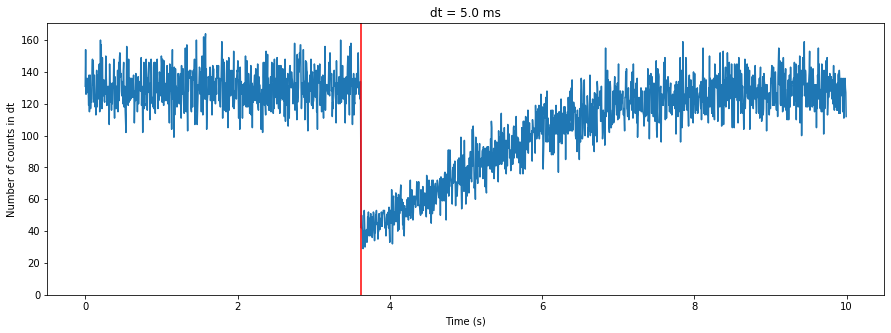

In [71]:
df = pd.read_csv(os.path.join(shift.time_stamp_files_folder_path, "cache", 'osc_evolution_003.csv'))
marker_idx = 0 # df[df['channel'] == 5].index[0]

df = df.loc[marker_idx+1:, :]
df = df[df['channel'] == 2].reset_index(drop=True)
df['time_sec'] = iota_period_sec * df['revolution']
df['time_sec'] -= df['time_sec'].iloc[0]

tmax = 10 # sec
dt = 5e-3 # sec

df = df[df['time_sec'] < tmax]

res = df.groupby((df['time_sec']/dt).astype(int)).apply(lambda x: len(x.index))
res_idx = np.arange(int(tmax/dt))
res_counts = np.zeros(shape=res_idx.shape)
res_counts[res.index] = res

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(dt * res_idx, res_counts)
ax.set_ylabel('Number of counts in dt')
ax.set_xlabel('Time (s)')
ax.axvline(marker_time, color='red')
ax.set_title(f'dt = {1e3*dt:.1f} ms')
ax.set_ylim(0, ax.get_ylim()[1])
plt.show()